# Latihan 
Gunakan data titanic dari seaborn.  
target = survived  
fitur = 'pclass','sex','age','fare'  

* isi missing value (pakai mean/med/mod)
* split data menjadi train dan set (80:20)
* bandingkan performa model berikut:
    * Logistic regresi tanpa scaling
    * Logistic regresi dengan scaling
    * KNN tanpa scaling
    * KNN dengan scaling
    * Decision Tree

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df[['pclass','sex', 'age','fare']]

,pclass,sex,age,fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [5]:
x = df[['pclass','sex', 'age','fare']]
y = df['survived']

In [6]:
x.isna().sum()

pclass      0
sex         0
age       177
fare        0
dtype: int64

In [7]:
from scipy.stats import normaltest
normaltest(df['age'].dropna())

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)

In [8]:
x['age'] = x['age'].fillna(x['age'].median())

<ipython-input-8-b87f1b1d8e90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'] = x['age'].fillna(x['age'].median())


In [9]:
x.isna().sum()

pclass    0
sex       0
age       0
fare      0
dtype: int64

In [60]:
x = pd.get_dummies(x,drop_first=True)
x

,pclass,age,fare,sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


## Splitting Data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y, 
    test_size = 0.2, 
    random_state = 2020
)

## Logistic regresi tanpa scaling

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
print('Nilai akurasi model ini:', accuracy_score(y_test,model.predict(x_test)))

Nilai akurasi model ini: 0.7932960893854749


## Logistic regresi dengan scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler() 
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [22]:
print('Nilai akurasi model ini:', accuracy_score(y_test,model.predict(x_test_scaled)))

Nilai akurasi model ini: 0.776536312849162


## Best K

In [28]:
import matplotlib.pyplot as plt

In [29]:
k = range(1,30,2)
testing_score = []
training_score = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    
    y_predict_train = knn.predict(x_train_scaled,)
    training_score.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_score.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k=i

C:\Users\algustie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\algustie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\algustie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\algu

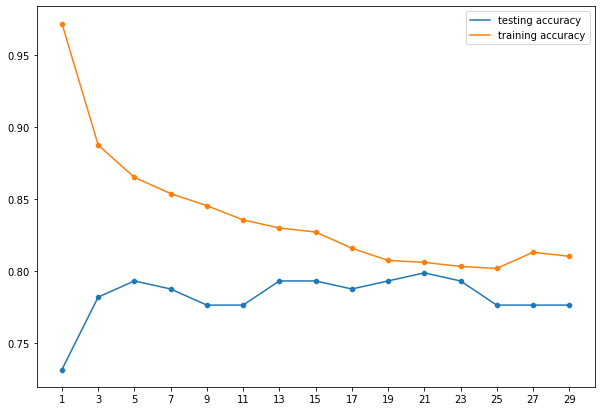

In [30]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_score)
sns.scatterplot(k, testing_score)
sns.lineplot(k, training_score)
sns.scatterplot(k, training_score)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xticks(list(k))
plt.show()

In [31]:
print('best k:', best_k)
print('best_score', score)

best k: 21
best_score 0.7988826815642458


## KNN tanpa scaling

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=21) 
knn.fit(x_train,y_train) 
y_predict = knn.predict(x_test)

In [33]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model KNN di dataset test adalah: 0.7039106145251397


## KNN dengan scaling

In [34]:
knn = KNeighborsClassifier(n_neighbors=21) 
knn.fit(x_train_scaled,y_train) 
y_predict = knn.predict(x_test_scaled)

In [35]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test,y_predict))

Akurasi model KNN di dataset test adalah: 0.7988826815642458


## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier(max_depth=2) 
tree.fit(x_train,y_train)
y_predict = tree.predict(x_test)

In [50]:
print('Nilai akurasi model ini:', accuracy_score(y_test, y_predict))

Nilai akurasi model ini: 0.7430167597765364


In [51]:
from sklearn.tree import plot_tree

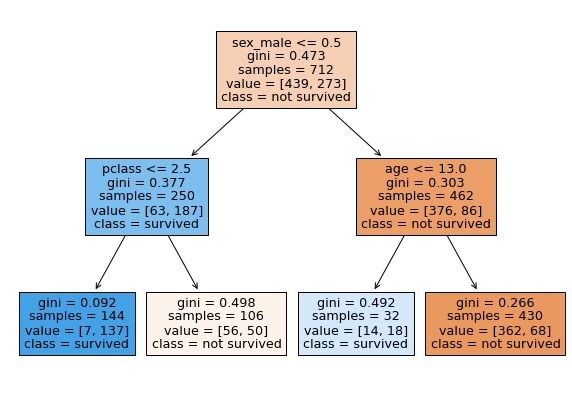

In [55]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names=list(x),class_names=['not survived','survived'], filled=True)
plt.show()

<AxesSubplot:xlabel='age', ylabel='fare'>

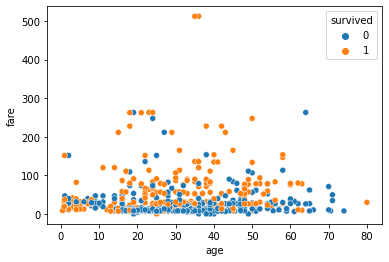

In [59]:
sns.scatterplot(x='age', y='fare', data=df, hue='survived')